### Q8 Association rule mining
Revisit the notes on association rule mining and the R example on music playlists: playlists.R and playlists.csv. Then use the data on grocery purchases in groceries.txt and find some interesting association rules for these shopping baskets. The data file is a list of shopping baskets: one person's basket for each row, with multiple items per row separated by commas. Pick your own thresholds for lift and confidence; just be clear what these thresholds are and say why you picked them. Do your discovered item sets make sense? Present your discoveries in an interesting and visually appealing way.

Notes:

This is an exercise in visual and numerical story-telling. Do be clear in your description of what you've done, but keep the focus on the data, the figures, and the insights your analysis has drawn from the data, rather than technical details. The data file is a list of baskets: one row per basket, with multiple items per row separated by commas. You'll have to cobble together your own code for processing this into the format expected by the "arules" package. This is not intrinsically all that hard, but it is the kind of data-wrangling wrinkle you'll encounter frequently on real problems, where your software package expects data in one format and the data comes in a different format. Figuring out how to bridge that gap is part of the assignment, and so we won't be giving tips on this front.

### General Approach

The approach for this problem statement has 4 parts:

1.Preprocessing and preparing the data for association rules analysis

2.Generating frequent item set

3.Calculating top 15 association rules between the items using 'support', 'confidence' and 'lift' and interpreting results



## 1. Data Preparation

In [43]:
#Importing necessary libraries, loading dataset and transforming dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Loop the data lines
with open("groceries.txt", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]


# Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

# Read csv
dataset = pd.read_csv("groceries.txt", header=None, delimiter=",", names=column_names)
dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Transforming the dataset into a list of lists
transactions = dataset.values.astype(str).tolist()
# Deleting 'nan' values
transactions = [[item for item in row if item != 'nan'] for row in transactions]
# Checking first 5 lists
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [45]:
# Creating dummy features for each distinct item
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 2. Frequent Itemset Generation

In [46]:
#creating frequent itemset based on min_support level of 0.1%
frequent_itemsets = apriori(df, min_support = 0.005, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
996,0.005186,"(whipped/sour cream, other vegetables, whole m..."
997,0.007829,"(yogurt, other vegetables, whole milk, root ve..."
998,0.007626,"(yogurt, other vegetables, tropical fruit, who..."
999,0.005592,"(whipped/sour cream, yogurt, other vegetables,..."


In [47]:
frequent_itemsets.nlargest(n = 15, columns = 'support')
# Support is just the plain basic probability of an event to occur.

,support,itemsets
117,0.255516,(whole milk)
73,0.193493,(other vegetables)
88,0.183935,(rolls/buns)
98,0.174377,(soda)
118,0.139502,(yogurt)
7,0.110524,(bottled water)
89,0.108998,(root vegetables)
110,0.104931,(tropical fruit)
96,0.098526,(shopping bags)
93,0.093950,(sausage)


<Axes: xlabel='itemsets', ylabel='support'>

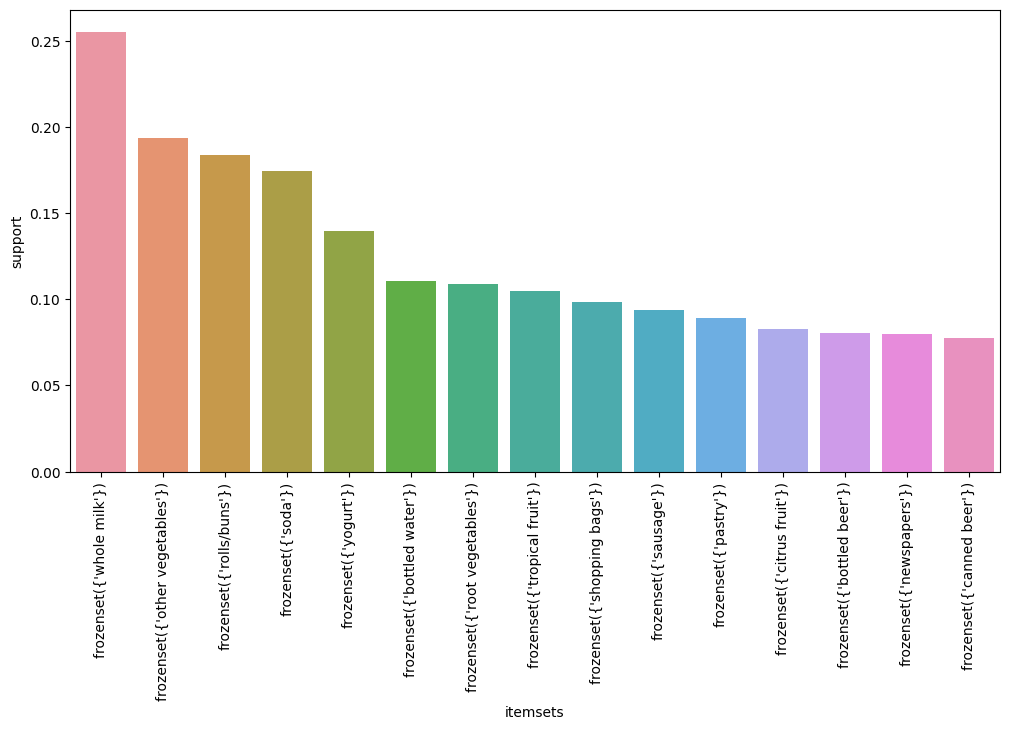

In [48]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x='itemsets', y='support', data=frequent_itemsets.nlargest(n = 15, columns = 'support'))

Whole milk, vegetables, rolls/buns, soda and yogurt are the most sold items

## 3. Association rule generation based on support, confidence and lift metrics

### a. Top 15 association rules based on support withmin threshold of 2%

Support measures the frequency of occurrence of a specific itemset (combination of items) in the dataset. It tells you how popular or prevalent the itemset is in the data.

In [61]:
#calculating rules using support
rules=association_rules(frequent_itemsets,metric='support',min_threshold=0.02)
rules.sort_values('support',ascending=False,inplace=True)

#eliminate redundant rules
def to_list(i):
    return (sorted(list(i)))


ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

# Sorting them with respect to support and getting top 15 rules 
top_15_sorted_rules = rules_no_redudancy.sort_values('support',ascending=False).head(15)
top_15_sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
65,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
89,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452,0.228543
121,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,0.488608
95,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202
53,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
67,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436,0.469042
51,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477,0.204103
113,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631,0.491782
108,(soda),(whole milk),0.174377,0.255516,0.040061,0.229738,0.899112,-0.004495,0.966533,-0.119646
84,(rolls/buns),(soda),0.183935,0.174377,0.038332,0.208402,1.195124,0.006258,1.042983,0.200066


C:\Users\Mayank\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\Mayank\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


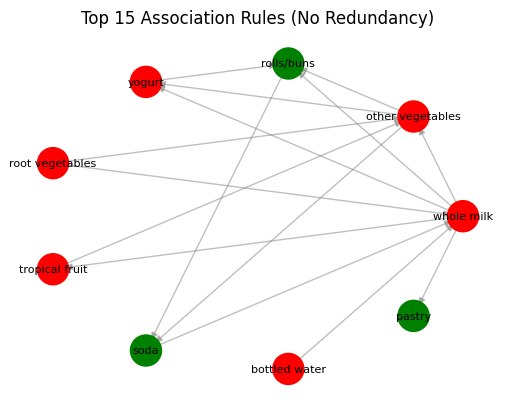

In [62]:
import networkx as nx
import matplotlib.pyplot as plt



# Creating a directed graph using NetworkX
G = nx.DiGraph()

# Adding nodes (antecedents and consequents)
for index, row in top_15_sorted_rules.iterrows():
    G.add_node(', '.join(row['antecedents']), color='r')  # Antecedent node in red
    G.add_node(', '.join(row['consequents']), color='g')  # Consequent node in green

# Add edges
for index, row in top_15_sorted_rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight = 1)

# Draw the network graph
pos = nx.circular_layout(G, scale=2.0)  # Use a layout algorithm to position nodes
node_colors = [node[1]['color'] for node in G.nodes(data=True)]
edges = G.edges()
edge_weights = [G[u][v]['weight'] for u, v in edges]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_weights, edge_color='gray', alpha=0.5)

# Label the nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title('Top 15 Association Rules (No Redundancy)')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

Rules based on support:

1.whole milk, vegetables, rolls/buns and yogurt tend to be bought together

2.milk, fruits and vegetables are also bought together

3.Milk and pastry are bought together

### 2. Top 15 association rules based on 50% confidence

Confidence measures the reliability or strength of a rule. It indicates the likelihood that an item in the consequent (output) of the rule appears in the transaction given that the items in the antecedent (input) of the rule are already present.

In [63]:
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.5)
rules.sort_values('confidence',ascending=False,inplace=True)

#To eliminate Redudancy in Rules
def to_list(i):
    return (sorted(list(i)))


ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

# Sorting them with respect to list and getting top 15 rules 
top_15_sorted_rules = rules_no_redudancy.sort_values('confidence',ascending=False).head(15)
top_15_sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
119,"(yogurt, tropical fruit, root vegetables)",(whole milk),0.008134,0.255516,0.005694,0.700000,2.739554,0.003616,2.481613,0.640185
103,"(root vegetables, other vegetables, pip fruit)",(whole milk),0.008134,0.255516,0.005491,0.675000,2.641713,0.003412,2.290720,0.626554
16,"(whipped/sour cream, butter)",(whole milk),0.010168,0.255516,0.006711,0.660000,2.583008,0.004113,2.189659,0.619150
84,"(whipped/sour cream, pip fruit)",(whole milk),0.009253,0.255516,0.005999,0.648352,2.537421,0.003635,2.117126,0.611558
17,"(yogurt, butter)",(whole milk),0.014642,0.255516,0.009354,0.638889,2.500387,0.005613,2.061648,0.608978
14,"(butter, root vegetables)",(whole milk),0.012913,0.255516,0.008236,0.637795,2.496107,0.004936,2.055423,0.607217
33,"(curd, tropical fruit)",(whole milk),0.010269,0.255516,0.006507,0.633663,2.479936,0.003883,2.032240,0.602956
100,"(whole milk, root vegetables, citrus fruit)",(other vegetables),0.009151,0.193493,0.005796,0.633333,3.273165,0.004025,2.199566,0.700899
105,"(yogurt, other vegetables, pip fruit)",(whole milk),0.008134,0.255516,0.005084,0.625000,2.446031,0.003005,1.985291,0.596023
41,"(domestic eggs, pip fruit)",(whole milk),0.008643,0.255516,0.005389,0.623529,2.440275,0.003181,1.977536,0.595356


C:\Users\Mayank\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\Mayank\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


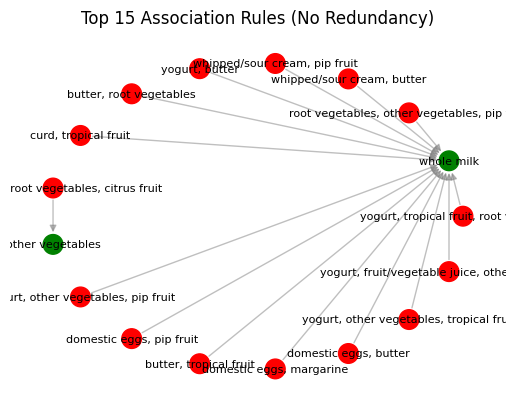

In [65]:
import networkx as nx
import matplotlib.pyplot as plt



# Creating a directed graph using NetworkX
G = nx.DiGraph()

# Adding nodes (antecedents and consequents)
for index, row in top_15_sorted_rules.iterrows():
    G.add_node(', '.join(row['antecedents']), color='r')  # Antecedent node in red
    G.add_node(', '.join(row['consequents']), color='g')  # Consequent node in green

# Add edges
for index, row in top_15_sorted_rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=1)

# Draw the network graph
pos = nx.circular_layout(G, scale = 2.0)  # Use a layout algorithm to position nodes
node_colors = [node[1]['color'] for node in G.nodes(data=True)]
edges = G.edges()
edge_weights = [G[u][v]['weight'] for u, v in edges]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_weights, edge_color='gray', alpha=0.5)

# Label the nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title('Top 15 Association Rules (No Redundancy)')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

Rules based on confidence:

1.Whole milk seems to be the item with highest association with other proucts. People generally tend to buy milk with, vegetables, fruits, rolls,eggs,butter and yogurt. So it can be placed in the middle aisle for easier accessibility.

2.fruits and vegetables are also bought together and can be placed in side-by-side sections

### 3. Top 15 association rules based on lift

Lift measures the strength of the association between the items in the antecedent and the items in the consequent, while taking into account the baseline occurrence of the consequent. It compares the observed support of the rule to what would be expected if the items were independent.

In [66]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1.5)
rules.shape
rules.head(1)
rules.sort_values('lift',ascending=False,inplace=True)

#To eliminate Redudancy in Rules
def to_list(i):
    return (sorted(list(i)))


ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

# Sorting them with respect to list and getting top 15 rules 
top_15_sorted_rules = rules_no_redudancy.sort_values('lift',ascending=False).head(15)
top_15_sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2167,"(tropical fruit, whole milk)","(yogurt, root vegetables)",0.042298,0.025826,0.005694,0.134615,5.212371,0.004602,1.125712,0.843841
2044,"(root vegetables, pip fruit)","(other vegetables, whole milk)",0.015557,0.074835,0.005491,0.352941,4.716272,0.004326,1.429801,0.800420
388,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407,0.805441
2098,"(tropical fruit, root vegetables)","(other vegetables, whole milk)",0.021047,0.074835,0.007016,0.333333,4.454257,0.005441,1.387748,0.792169
2029,"(yogurt, other vegetables)","(fruit/vegetable juice, whole milk)",0.043416,0.026640,0.005084,0.117096,4.395570,0.003927,1.102453,0.807560
2019,"(root vegetables, citrus fruit)","(other vegetables, whole milk)",0.017692,0.074835,0.005796,0.327586,4.377460,0.004472,1.375887,0.785453
2141,"(tropical fruit, whole milk)","(yogurt, other vegetables)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976,0.792714
2110,"(whipped/sour cream, root vegetables)","(other vegetables, whole milk)",0.017082,0.074835,0.005186,0.303571,4.056556,0.003907,1.328442,0.766580
2124,"(yogurt, root vegetables)","(other vegetables, whole milk)",0.025826,0.074835,0.007829,0.303150,4.050919,0.005896,1.327638,0.773109
891,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171,0.810342


C:\Users\Mayank\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\Mayank\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


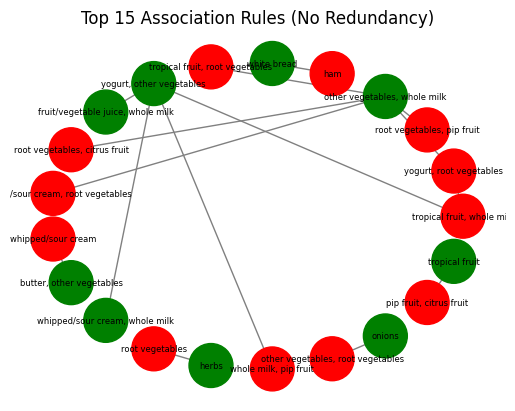

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes (antecedents and consequents)
for index, row in top_15_sorted_rules.iterrows():
    G.add_node(', '.join(row['antecedents']), color='r')  # Antecedent node in red
    G.add_node(', '.join(row['consequents']), color='g')  # Consequent node in green

# Add edges
for index, row in top_15_sorted_rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=1)

# Draw the network graph
pos = nx.circular_layout(G, scale=1.0)  # Use a layout algorithm to position nodes
node_colors = [node[1]['color'] for node in G.nodes(data=True)]
edges = G.edges()
edge_weights = [G[u][v]['weight'] for u, v in edges]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_weights, edge_color='gray', alpha=1)

# Label the nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=6)



plt.title('Top 15 Association Rules (No Redundancy)')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

Rules based on lift:

1.Whenever people buy ham they tend to buy white bread

2.Whenever people buy root vegetables they tend to buy herbs

3.Vegetables, milk, fruit and yogurt are bought together

Hence all these sections can be placed in closeproximity of each other for a better buying experience